In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env

pd.set_option('display.max_rows', 100)

In [2]:
def zillow_2017_data():
    '''
    This function uses a SQL query to access the Codeup MySQL database and join 
    together all the relevant data from the zillow database.
    The data obtained includes all properties in the dataset which had a transaction in 2017.
    The function caches a csv in the local directory for later use. 
    '''
    # establish a filename for the local csv
    filename = 'zillow.csv'
    # check to see if a local copy already exists. 
    if os.path.exists(filename):
        print('Reading from local CSV...')
        # if so, return the local csv
        return pd.read_csv(filename)
    # otherwise, pull the data from the database:
    # establish database url
    url = env.get_db_url('zillow')
    # establish query
    sql = '''
            SELECT prop.*,
                   pred.logerror,
                   const.typeconstructiondesc,
                   arch.architecturalstyledesc,
                   land.propertylandusedesc,
                   heat.heatingorsystemdesc,
                   air.airconditioningdesc, 
                   bldg.buildingclassdesc,
                   story.storydesc
              FROM properties_2017 prop
                JOIN predictions_2017            pred  USING(parcelid)
                LEFT JOIN typeconstructiontype   const USING(typeconstructiontypeid)
                LEFT JOIN architecturalstyletype arch  USING(architecturalstyletypeid)
                LEFT JOIN propertylandusetype    land  USING(propertylandusetypeid)
                LEFT JOIN heatingorsystemtype    heat  USING(heatingorsystemtypeid)
                LEFT JOIN airconditioningtype    air   USING(airconditioningtypeid)
                LEFT JOIN buildingclasstype      bldg  USING(buildingclasstypeid)
                LEFT JOIN storytype              story USING(storytypeid)
              WHERE pred.transactiondate LIKE "2017%%"
                AND pred.transactiondate in (
                                             SELECT MAX(transactiondate)
                                               FROM predictions_2017
                                               GROUP BY parcelid
                                             )
                AND prop.latitude IS NOT NULL
                AND prop.longitude IS NOT NULL;
            '''
    print('No local file exists\nReading from SQL database...')
    # query the database and return the resulting table as a pandas dataframe
    df = pd.read_sql(sql, url)
    # save the dataframe to the local directory as a csv
    print('Saving to local CSV... ')
    df.to_csv(filename, index=False)
    # return the resulting dataframe
    return df

In [3]:
df = zillow_2017_data()

Reading from local CSV...


/var/folders/zb/3lg9b5xn3831bhkh23bd5bs00000gn/T/ipykernel_31752/2797934771.py:1: DtypeWarning: Columns (65) have mixed types.Specify dtype option on import or set low_memory=False.
  df = zillow_2017_data()


In [4]:
id_cols = [col for col in df.columns if 'typeid' in col or col in ['id', 'parcelid']]
df = df.drop(columns=id_cols)

In [5]:
df.shape

(77579, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77579 entries, 0 to 77578
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   basementsqft                  50 non-null     float64
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   calculatedbathnbr             76963 non-null  float64
 4   finishedfloor1squarefeet      6037 non-null   float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   finishedsquarefeet13          42 non-null     float64
 8   finishedsquarefeet15          3027 non-null   float64
 9   finishedsquarefeet50          6037 non-null   float64
 10  finishedsquarefeet6           386 non-null    float64
 11  fips                          77579 non-null  float64
 12  fireplacecnt                  8289 non-null   float64
 13  f

In [7]:
df.describe()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,50.000000,77579.000000,77579.000000,76963.000000,6037.000000,77378.000000,73923.000000,42.000000,3027.000000,6037.000000,...,17599.000000,172.0,7.746400e+04,7.757800e+04,77579.0,7.757700e+04,77574.000000,2900.000000,7.733200e+04,77579.000000
mean,679.720000,2.298496,3.053223,2.316392,1366.165314,1784.935421,1760.284553,1388.761905,2354.491245,1381.388935,...,1.434286,1.0,1.892811e+05,4.901506e+05,2016.0,3.011515e+05,5995.961788,14.088276,6.049667e+13,0.016803
std,689.703546,0.996732,1.140480,0.979689,670.701336,954.250373,934.352566,122.220874,1186.985442,725.792665,...,0.544515,0.0,2.304107e+05,6.537979e+05,0.0,4.927249e+05,7628.859728,2.181281,1.533339e+12,0.170738
min,38.000000,0.000000,0.000000,1.000000,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,273.000000,2.000000,2.000000,2.000000,955.000000,1182.000000,1172.000000,1344.000000,1624.000000,956.000000,...,1.000000,1.0,8.417925e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,14.000000,6.037311e+13,-0.024309
50%,515.000000,2.000000,3.000000,2.000000,1257.000000,1542.000000,1523.000000,1440.000000,2088.000000,1259.000000,...,1.000000,1.0,1.364045e+05,3.588785e+05,2016.0,2.031880e+05,4448.265000,15.000000,6.037603e+13,0.006676
75%,796.500000,3.000000,4.000000,3.000000,1615.000000,2112.000000,2075.000000,1440.000000,2831.000000,1621.000000,...,2.000000,1.0,2.187340e+05,5.690000e+05,2016.0,3.667530e+05,6926.917500,15.000000,6.059042e+13,0.039291
max,3560.000000,18.000000,16.000000,18.000000,6912.000000,35640.000000,21929.000000,1560.000000,35640.000000,12467.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


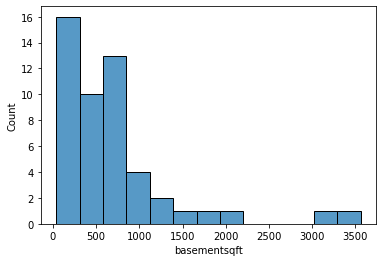

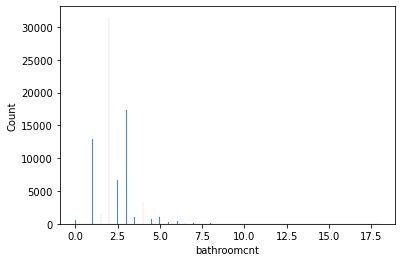

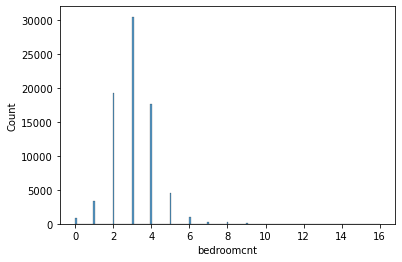

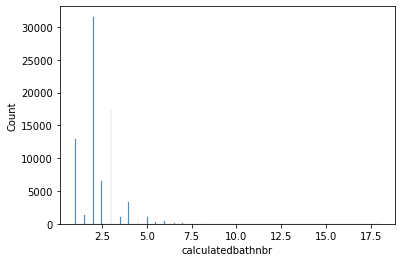

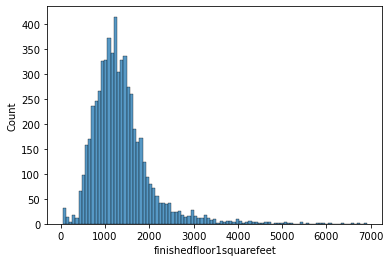

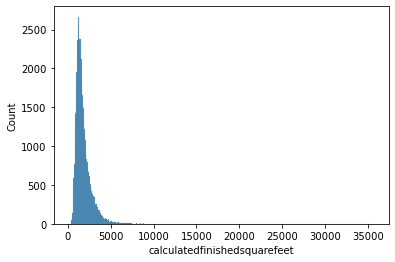

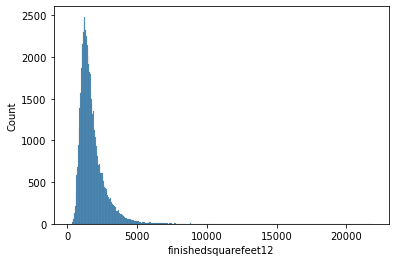

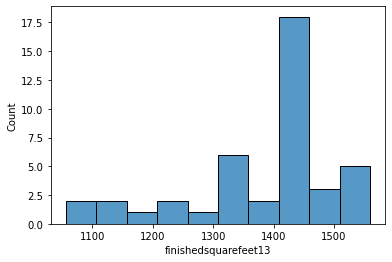

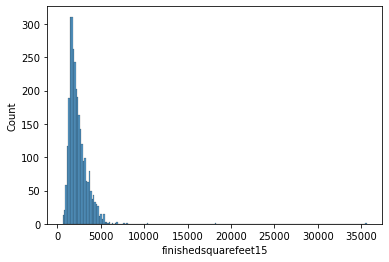

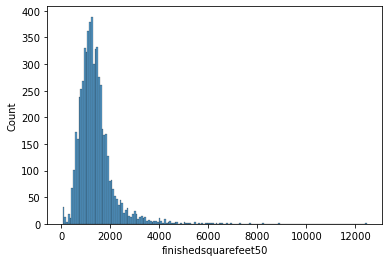

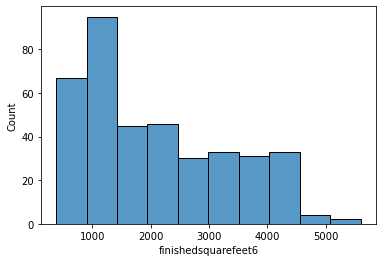

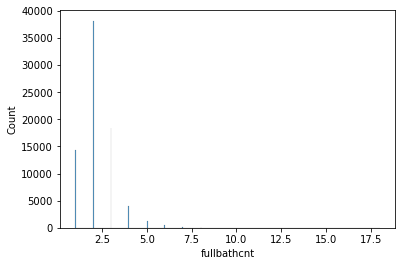

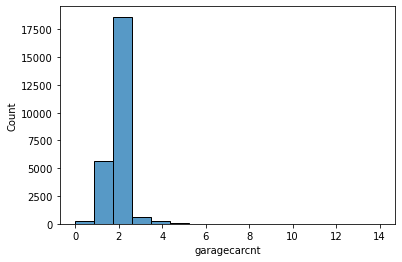

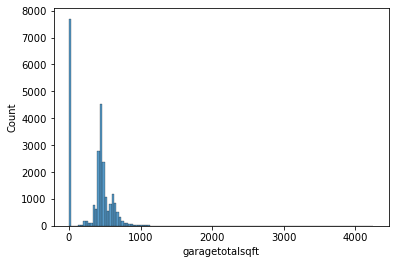

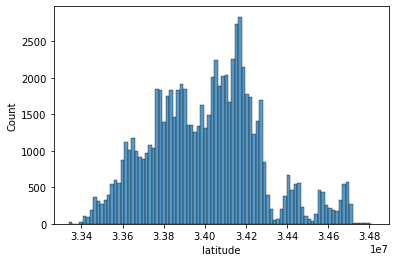

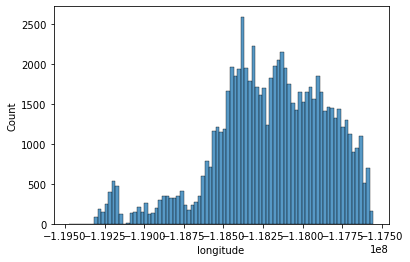

KeyboardInterrupt: 

In [8]:
quant_cols = [col for col in df.columns if ((df[col].dtype != 'object') 
                                             & (len(df[col].unique()) > 10) 
                                             & ('regionid' not in col) 
                                             & ('census' not in col))]
for col in quant_cols:
    sns.histplot(data=df, x=col)
    plt.show()

In [ ]:
categ_cols = [col for col in df.columns if (col not in quant_cols) and ('census' not in col)]

In [ ]:
for col in categ_cols:
    print('-' * 25)
    print(col.upper())
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.show()

In [9]:
def get_row_nulls(df):    
    df2 = pd.DataFrame()
    df2['n_rows_null'] = df.isnull().sum()
    df2['pct_rows_null'] = df.isnull().mean()
    df2 = df2.reset_index()
    df2 = df2.rename(columns={'index': 'feature'})
    return df2

In [40]:
# how often does finishedfloor1squarefeet match calculatedfinishedsquarefeet for homes that only have one floor
(df[df.numberofstories == 1].calculatedfinishedsquarefeet == df[df.numberofstories == 1].finishedfloor1squarefeet).sum()
# answer: not very often

2809

In [80]:
df.rawcensustractandblock.nunique()

39191

In [81]:
df.censustractandblock.nunique()

39006

In [84]:
(df[['rawcensustractandblock', 'censustractandblock']])

,rawcensustractandblock,censustractandblock
0,6.059063e+07,6.059063e+13
1,6.111001e+07,6.111001e+13
2,6.059022e+07,6.059022e+13
3,6.037300e+07,6.037300e+13
4,6.037124e+07,6.037124e+13
...,...,...
77574,6.037132e+07,6.037132e+13
77575,6.037101e+07,6.037101e+13
77576,6.111008e+07,6.111008e+13
77577,6.037434e+07,6.037434e+13


In [10]:
get_row_nulls(df)

,feature,n_rows_null,pct_rows_null
0,basementsqft,77529,0.999355
1,bathroomcnt,0,0.000000
2,bedroomcnt,0,0.000000
3,calculatedbathnbr,616,0.007940
4,finishedfloor1squarefeet,71542,0.922183
5,calculatedfinishedsquarefeet,201,0.002591
6,finishedsquarefeet12,3656,0.047126
7,finishedsquarefeet13,77537,0.999459
8,finishedsquarefeet15,74552,0.960982
9,finishedsquarefeet50,71542,0.922183


In [78]:
df.censustractandblock.nunique()

39006

In [21]:
(df.calculatedbathnbr == df.bathroomcnt).sum()

76963

In [11]:
def get_column_nulls(df):   
    df2 = pd.DataFrame(df.isnull().sum(axis=1))
    df2.columns = ['n_cols_null']
    df2['pct_cols_null'] = df.isnull().mean(axis=1)
    return df2

In [12]:
get_column_nulls(df)

,n_cols_null,pct_cols_null
0,25,0.471698
1,22,0.415094
2,24,0.452830
3,24,0.452830
4,22,0.415094
...,...,...
77574,22,0.415094
77575,24,0.452830
77576,21,0.396226
77577,24,0.452830


#### How to handle null values, by column:
- basement_qft: nearly 100% null. Likely null values represent 0 because homes in southern California typically do not have basements. We could therefore impute with 0, but this would not add value to our analysis since nearly all columns would contain the same value. We will drop this column. 
- calculatedbathnbr: this column is the same as bathroomcnt, so we will drop it 
- finishedfloor1sqft: 92% null. Further, we should expect this column to match the total square feet of the home in the case of homes with only one floor. However, this is almost never the case, so how useful can this information really be? We will drop this column. 
- calculatedfinishedsquarefeet: this is a very important column, and it is missing less than 1% of values. Therefore, we will keep the column, but drop all rows where this is null. 
- finishedsquarefeet12: according to the data dictionary, this column provides the same information as calculatedfinishedsquarefeet, but has many more null values. Therefore we will drop this column. 
- finishedsquarefeet13: too many nulls, drop column
- finishedsquarefeet15: too many nulls, drop column
- finishedsquarefeet50: too many nulls, drop column
- finishedsquarefeet6: too many nulls, drop column
- fireplacecnt: there are no 0 values in this column. it would therefore be reasonable to assume that null values represent homes with no fireplace. We will impute nulls with 0.
- fireplaceflag: this column is almost entirely null. further, we have this same information from the fireplacecnt column. we will drop fireplaceflag.
- fullbathcnt: provides important info and has very few null values. We will keep this column and drop rows where it is null
- garagecarcnt:there are no 0 values in this column. it would therefore be reasonable to assume that null values represent homes with no garage. We will impute nulls with 0.
- garagetotalsqft: again, it would be reasonable to assume nulls represent homes with no garage. Further, this column is null every time garagecarcnt is null. We will impute nulls with 0.
- hashottuborspa: this is a boolean column, but has no 0 values in it, only 1's. It is therefore reasonable to assume nulls should have been zeros. We will impute with 0.
- poolcnt: there are no 0 values in this column. it would therefore be reasonable to assume that null values represent homes with no pool. We will impute nulls with 0.
- poolsizesum: too many nulls, drop column
- propertyzoningdesc: too many nulls, and too many unique values for a categorical variable. drop for now.
- regionidcity: drop for now. later, figure out how to impute by location
- threequarterbathnbr: there are no 0 values in this column. it would therefore be reasonable to assume that null values represent homes with no 3/4 bath. We will impute nulls with 0.
- yardbuildingsquarefeet17: too many nulls, drop column
- yardbuildingsquarefeet26: too many nulls, drop column
- yearbuilt: valuable information, not many nulls, keep column, drop rows where null
- numberofstories: valuable information, too many nulls. drop for now, determine later how to impute
- structuretaxvaluedollarcnt: leaks information about target. drop column
- taxvaluedollarcnt: target column. only one null. drop row where null
- landtaxvaluedollarcnt: leaks information about target. drop column
- taxamount: leaks information about target. drop column
- taxdelinquencyflag: reasonable to assume nulls represent no tax delinquency. impute with 0
- taxdelinquencyyear: could be useful information, but probably not a huge driver. drop for now. figure out how to impute later
- censustractandblock: valuable location information, not many nulls. keep column, drop rows where null.
- rawcensustractandblock: appears to provide the same information as censustractandblock. drop column. 
- typeconstructiondesc: too many nulls, drop column
- architecturalstyledesc: too many nulls, drop column
- heatingorsystemdesc: valuable info, but significant number of nulls. drop now, impute later.
- airconditioningdesc: valuable info, but significant number of nulls, drop now, impute later.
- buildingclassdesc: too many nulls, drop column
- storydesc: too many nulls, drop column


- unitcnt: requres further investigation
- lotsizesquarefeet: this is imporant information, with a significant number of nulls (10%). further investigation might find that this is null only in cases where the home does not have a lot (condos, townhomes, etc). requires further analysis before determining how to proceed

#### Remove any properties that are likely to be something other than single unit properties

In [87]:
df = df[df.propertylandusedesc == 'Single Family Residential']

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row). 

In [ ]:
columns_to_drop = ['calculatedbathnbr',
                   'finishedfloor1sqft',
                   'finishedsquarefeet12']